# Plots of Watershed Algorithm on Comet Using RADICAL-Pilot

In [1]:
%matplotlib inline
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

from pprint import PrettyPrinter
pp = PrettyPrinter(indent=4).pprint

blues   = cm.get_cmap(plt.get_cmap('Blues'))
greens  = cm.get_cmap(plt.get_cmap('Greens'))
reds    = cm.get_cmap(plt.get_cmap('Reds'))
oranges = cm.get_cmap(plt.get_cmap('Oranges'))
purples = cm.get_cmap(plt.get_cmap('Purples'))
greys   = cm.get_cmap(plt.get_cmap('Greys'))

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import warnings
warnings.filterwarnings('ignore')

def merge_dicts(x, y):
    z = x.copy()   # start with x's keys and values
    z.update(y)    # modifies z with y's keys and values & returns None
    return z

Calculate the mean and standard deviation of Pilot execution times

In [2]:
folder      = 'data_watershed_rp'
weak_data   = 'watershed_rp_weak_20to29.csv'
strong_data = 'watershed_rp_strong_20to29.csv'

columns=['nodes', 'duration_TTC', 'duration_Units']

raw_weakdf   = pd.read_csv(os.path.join(folder, weak_data))[columns]
raw_strongdf = pd.read_csv(os.path.join(folder, strong_data))[columns]

weak_mean    = raw_weakdf.groupby('nodes').mean()
weak_error   = raw_weakdf.groupby('nodes').std()
strong_mean  = raw_strongdf.groupby('nodes').mean()
strong_error = raw_strongdf.groupby('nodes').std()

weak_diff    = weak_mean.copy()
weak_diff['duration_diff'] = weak_diff['duration_TTC'] - weak_diff['duration_Units']
weak_diff    = weak_diff.drop(columns=['duration_TTC', 'duration_Units'])
strong_diff    = strong_mean.copy()
strong_diff['duration_diff'] = strong_diff['duration_TTC'] - strong_diff['duration_Units']
strong_diff    = strong_diff.drop(columns=['duration_TTC', 'duration_Units'])


Plot mean Pilot and Unit execution times

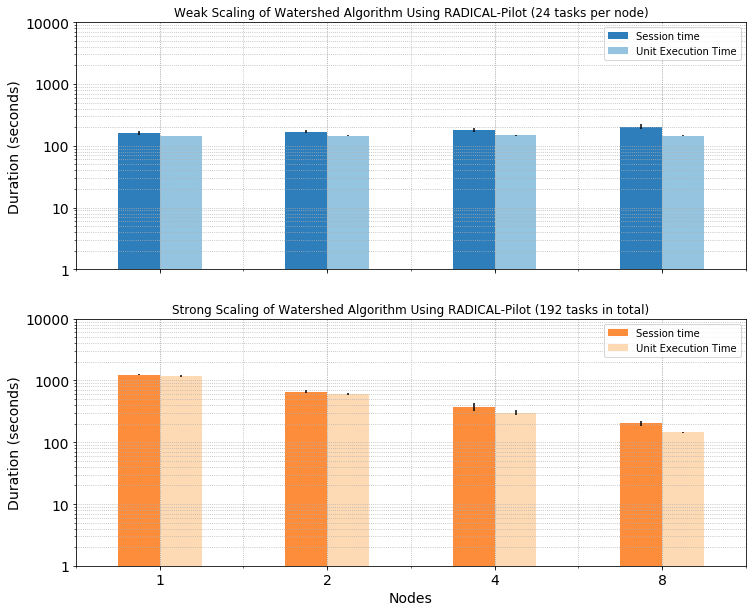

In [8]:
fig, axes = plt.subplots(nrows=2,ncols=1,sharex=True,sharey=True)
fig.set_size_inches(12,10)
width = 0.2

yticks = [1, 10, 100, 1000, 10000]
yticklabels = [str(ytick) for ytick in yticks]

blues   = cm.get_cmap(plt.get_cmap('Blues'))
greens  = cm.get_cmap(plt.get_cmap('Greens'))
reds    = cm.get_cmap(plt.get_cmap('Reds'))
oranges = cm.get_cmap(plt.get_cmap('Oranges'))
purples = cm.get_cmap(plt.get_cmap('Purples'))
greys   = cm.get_cmap(plt.get_cmap('Greys'))

weak_client_color = blues(0.7)
weak_task_color = blues(0.4)
strong_client_color = oranges(0.5)
strong_task_color = oranges(0.2)

weak_kwargs    = {'kind'     : 'bar',
                 'log'      : True,
                 'fontsize' : 14,
                 'title'    : 'Weak Scaling of Watershed Algorithm Using RADICAL-Pilot (24 tasks per node)',
                 'ax'       : axes[0],
                 'yerr'     : weak_error,
                 'color'    : [weak_client_color, weak_task_color]
                  }
strong_kwargs  = {'kind'     : 'bar',
                 'log'      : True,
                 'fontsize' : 14,
                 'title'    : 'Strong Scaling of Watershed Algorithm Using RADICAL-Pilot (192 tasks in total)',
                 'ax'       : axes[1],
                 'yerr'     : strong_error,
                 'color'    : [strong_client_color, strong_task_color]
                }

weak_scale_plot = weak_mean.plot(**weak_kwargs)
weak_scale_plot.set_ylabel('Duration (seconds)', fontsize=14)
weak_scale_plot.set_ylim(bottom=min(yticks), top=max(yticks))
weak_scale_plot.set_yticks(yticks)
weak_scale_plot.set_yticklabels(yticklabels, fontsize=14)
weak_scale_plot.grid('on', which='both', linestyle=':')
axes[0].legend(['Session time', 'Unit Execution Time'])

strong_scale_plot = strong_mean.plot(**strong_kwargs)
strong_scale_plot.set_ylabel('Duration (seconds)', fontsize=14)
strong_scale_plot.set_ylim(bottom=min(yticks), top=max(yticks))
strong_scale_plot.set_yticks(yticks)
strong_scale_plot.set_yticklabels(yticklabels, fontsize=14)
strong_scale_plot.set_xticklabels(['1','2','4','8'], rotation=0, fontsize=14)
strong_scale_plot.grid('on', which='both', linestyle=':')
strong_scale_plot.set_xlabel('Nodes', fontsize=14)
axes[1].legend(['Session time', 'Unit Execution Time'])

Plot difference between Pilot and Unit execution times

Text(0.5,0,'Nodes')

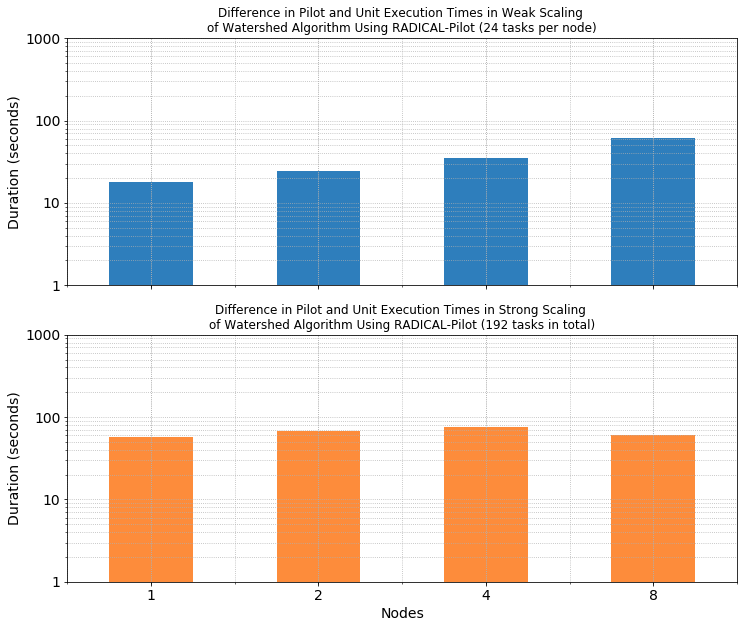

In [9]:
fig, axes = plt.subplots(nrows=2,ncols=1,sharex=True,sharey=True)
fig.set_size_inches(12,10)
width = 0.2

shared_kwargs = {'kind'     : 'bar',
                 'legend'   : False,
                 'log'      : True,
                 'fontsize' : 14
                }

weak_title    = {'title'    : 'Difference in Pilot and Unit Execution Times in Weak Scaling \nof Watershed Algorithm Using RADICAL-Pilot (24 tasks per node)',
                 'ax'       : axes[0],
                 'color'    : weak_client_color,
                  }
strong_title  = {'title'    : 'Difference in Pilot and Unit Execution Times in Strong Scaling \nof Watershed Algorithm Using RADICAL-Pilot (192 tasks in total)',
                 'ax'       : axes[1],
                 'color'    : strong_client_color,
                }

weak_kwargs     = merge_dicts(shared_kwargs, weak_title)
weak_scale_plot = weak_diff.plot(**weak_kwargs)
weak_scale_plot.set_ylabel('Duration (seconds)', fontsize=14)
weak_scale_plot.set_yticks([1, 10, 100, 1000])
weak_scale_plot.set_yticklabels(['1','10','100','1000'], fontsize=14)
weak_scale_plot.set_ylim([0, 1000])
weak_scale_plot.grid('on', which='both', linestyle=':')

strong_kwargs     = merge_dicts(shared_kwargs, strong_title)
strong_scale_plot = strong_diff.plot(**strong_kwargs)
strong_scale_plot.set_ylabel('Duration (seconds)', fontsize=14)
strong_scale_plot.set_yticks([1, 10, 100, 1000])
strong_scale_plot.set_yticklabels(['1','10','100','1000'], fontsize=14)
strong_scale_plot.set_xticklabels(['1','2','4','8'], rotation=0, fontsize=14)
strong_scale_plot.grid('on', which='both', linestyle=':')
strong_scale_plot.set_xlabel('Nodes', fontsize=14)

## Plot Speedup of Weak and Strong Scaling

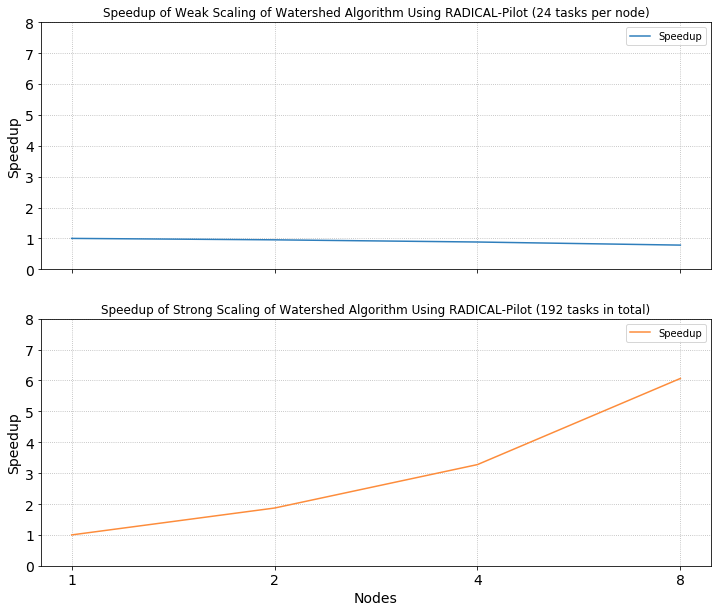

In [13]:
fig, axes = plt.subplots(nrows=2,ncols=1,sharex=True,sharey=True)
fig.set_size_inches(12,10)
width = 0.2

weak_speedups = pd.DataFrame(columns=['nodes', 'speedup'])
for i in range(len(weak_mean['duration_TTC'])):
    nodes   = weak_mean.index.get_values()[i]
    speedup = weak_mean['duration_TTC'].iloc[0] / weak_mean['duration_TTC'].iloc[i]
    data = {'nodes': nodes, 'speedup': speedup}
    weak_speedups = weak_speedups.append(data, ignore_index=True).reset_index(drop=True)
weak_speedups = weak_speedups.set_index('nodes')

strong_speedups = pd.DataFrame(columns=['nodes', 'speedup'])
for i in range(len(strong_mean['duration_TTC'])):
    nodes   = strong_mean.index.get_values()[i]
    speedup = strong_mean['duration_TTC'].iloc[0] / strong_mean['duration_TTC'].iloc[i]
    data = {'nodes': nodes, 'speedup': speedup}
    strong_speedups = strong_speedups.append(data, ignore_index=True).reset_index(drop=True)
strong_speedups = strong_speedups.set_index('nodes')

yticks = list(range(9))
yticklabels = [str(i) for i in range(9)]

weak_color = blues(0.7)
strong_color = oranges(0.5)

weak_kwargs    = {
                 'kind'     : 'line',
                 'fontsize' : 14,
                 'title'    : 'Speedup of Weak Scaling of Watershed Algorithm Using RADICAL-Pilot (24 tasks per node)',
                 'ax'       : axes[0],
                 'color'    : [blues(0.7)]
                  }
strong_kwargs  = {
                 'kind'     : 'line',
                 'fontsize' : 14,
                 'title'    : 'Speedup of Strong Scaling of Watershed Algorithm Using RADICAL-Pilot (192 tasks in total)',
                 'ax'       : axes[1],
                 'color'    : [oranges(0.5)]
                }

weak_speedups_plot = weak_speedups.plot(**weak_kwargs)
weak_speedups_plot.set_ylabel('Speedup', fontsize=14)
weak_speedups_plot.set_ylim(bottom=0, top=8)
weak_speedups_plot.set_yticks(yticks)
weak_speedups_plot.set_yticklabels(yticklabels, fontsize=14)
weak_speedups_plot.set_xscale('log', basex=2)
weak_speedups_plot.set_xlabel('Nodes', fontsize=14)
weak_speedups_plot.grid('on', which='both', linestyle=':')
axes[0].legend(['Speedup'])

strong_speedups_plot = strong_speedups.plot(**strong_kwargs)
strong_speedups_plot.set_ylabel('Speedup', fontsize=14)
strong_speedups_plot.set_ylim(bottom=0, top=8)
strong_speedups_plot.set_yticks(yticks)
strong_speedups_plot.set_yticklabels(yticklabels, fontsize=14)
strong_speedups_plot.set_xlabel('Nodes', fontsize=14)
strong_speedups_plot.set_xscale('log', basex=2)
strong_speedups_plot.set_xticks([1,2,4,8])
strong_speedups_plot.set_xticklabels(['1','2','4','8'], rotation=0, fontsize=14)
strong_speedups_plot.grid('on', which='both', linestyle=':')
axes[1].legend(['Speedup'])